In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import Normalizer
from sklearn.metrics import coverage_error, label_ranking_average_precision_score, label_ranking_loss
from sklearn import metrics

In [ ]:
cd /content/drive/My Drive/Colab Notebooks/Breast Cancer

/content/drive/My Drive/Colab Notebooks/Breast Cancer


In [ ]:
ls

DT.ipynb  RF.ipynb  SVM.ipynb  upscale.csv


In [ ]:
def read_data(path):
    data = pd.read_csv(path)
    data.set_index("Hybridization REF",inplace = True)
    labels = data.pop("CANCER")
    return data, labels

In [ ]:
X,y=read_data("upscale.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear') 
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9722222222222222


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[101   2]
 [  4 109]]


[[101   2]
 [  4 109]]


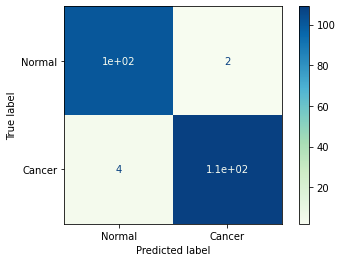

In [ ]:
from sklearn.metrics import log_loss, ConfusionMatrixDisplay, average_precision_score, accuracy_score
label = ["Normal", "Cancer"]
cm = confusion_matrix(y_test, y_pred)
print(cm)
cm_display = ConfusionMatrixDisplay(cm,display_labels = label).plot(cmap = "GnBu")
path="/content/drive/My Drive/Colab Notebooks/BreastCancer/"
name="matrix"
#plt.savefig(f'{path}{name}.png')
plt.show()

In [ ]:
pip install eli5

     |████████████████████████████████| 112kB 9.1MB/s 


In [ ]:
from eli5 import show_prediction
import eli5 as eli

eli.show_prediction(clf, X_test.iloc[44],
                    feature_names=list(X.columns),
                    show_feature_values=True)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from eli5 import show_prediction
import eli5 as eli

eli.show_prediction(clf, X_test.iloc[35],
                    feature_names=list(X.columns),
                    show_feature_values=True)